<a href="https://colab.research.google.com/github/meti-94/TextClassification/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install umap-learn[plot] -q
!pip install holoviews -q
!pip install -U ipykernel -q 
!pip install bokeh -q 
!pip install sentence_transformers -q

     |████████████████████████████████| 80 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 15.7 MB/s 
     |████████████████████████████████| 15.8 MB 597 bytes/s 
     |████████████████████████████████| 76 kB 6.4 MB/s 
     |████████████████████████████████| 118 kB 63.6 MB/s 
     |████████████████████████████████| 769 kB 43.9 MB/s 
     |████████████████████████████████| 766 kB 38.7 MB/s 
     |████████████████████████████████| 1.0 MB 24.5 MB/s 
     |████████████████████████████████| 722 kB 42.5 MB/s 
     |████████████████████████████████| 722 kB 45.7 MB/s 
     |████████████████████████████████| 715 kB 42.3 MB/s 
     |████████████████████████████████| 705 kB 61.8 MB/s 
     |████████████████████████████████| 699 kB 76.1 MB/s 
     |████████████████████████████████| 696 kB 54.5 MB/s 
     |████████████████████████████████| 684 kB 55.5 MB/s 
     |████████████████████████████████| 679 kB 33.0 MB/s 
     |████████████████████████████████| 675 kB 52.8 MB/s 
     |█████████

In [2]:
import pandas as pd
import umap 
import umap.plot

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from bokeh.plotting import show, save, output_notebook, output_file

In [3]:
vectorizer = CountVectorizer(min_df=5)
documents = pd.read_excel('./test.xlsx')['text'].to_list()
word_doc_matrix = vectorizer.fit_transform(documents)

In [4]:
embedding = umap.UMAP(n_components=2, metric='cosine').fit(word_doc_matrix)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


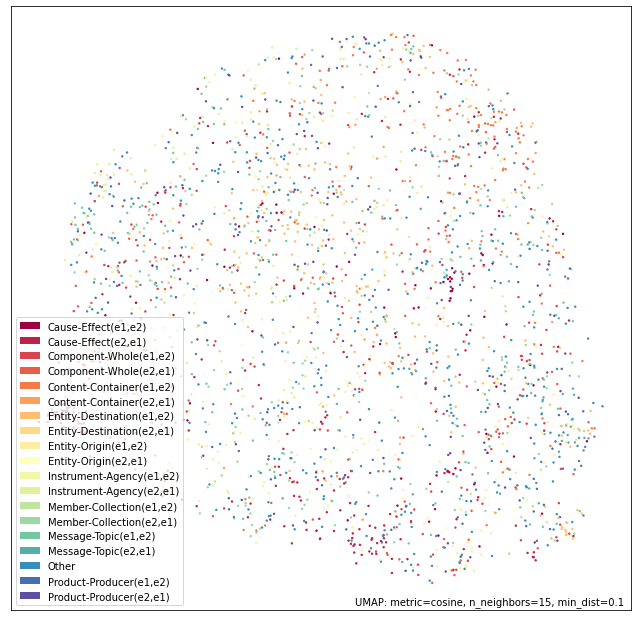

In [5]:
targets = pd.read_excel('./test.xlsx')['target']
f = umap.plot.points(embedding, labels=targets)

In [6]:
tfidf_vectorizer = TfidfVectorizer(min_df=5)
tfidf_word_doc_matrix = tfidf_vectorizer.fit_transform(documents)

In [7]:
embedding2 = umap.UMAP(n_components=2, metric='cosine').fit(tfidf_word_doc_matrix)


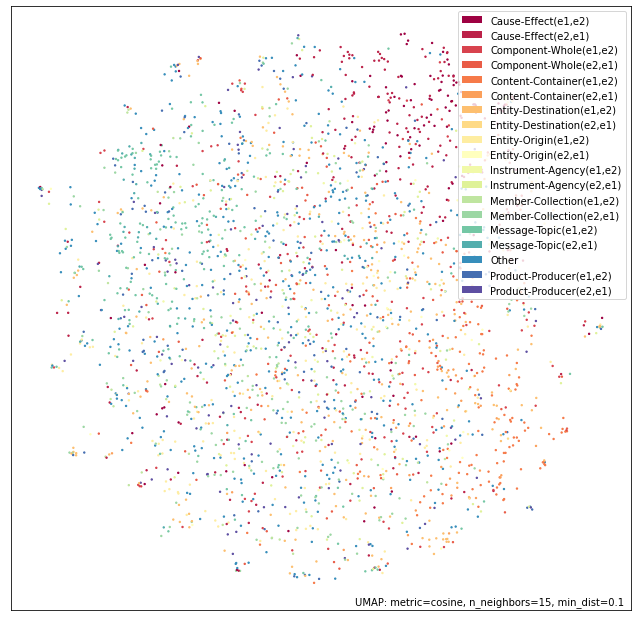

In [8]:
f = umap.plot.points(embedding2, labels=targets)

In [9]:
import sklearn.cluster as cluster
import numpy as np 


In [10]:
kmeans_labels = cluster.KMeans(n_clusters=40).fit_predict(tfidf_word_doc_matrix)

In [11]:
from sentence_transformers import SentenceTransformer
transformer_model = SentenceTransformer('HooshvareLab/bert-fa-zwnj-base')

Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/HooshvareLab_bert-fa-zwnj-base were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at /root/.cache/torch/sentence_transformers/HooshvareLab

In [12]:
sentence_embeddings = transformer_model.encode(documents)

In [13]:
embedding3 = umap.UMAP(n_components=2, metric='cosine').fit(sentence_embeddings)

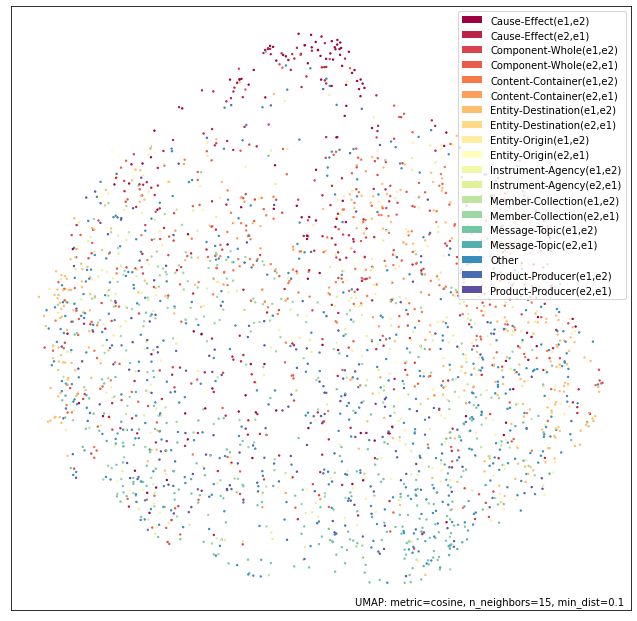

In [14]:
g = umap.plot.points(embedding3, labels=targets)

In [26]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, TFAutoModel, BertForSequenceClassification, BertModel
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from sklearn import preprocessing
import numpy as np
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.metrics import plot_confusion_matrix
import pickle
from sklearn.metrics import confusion_matrix
# from cmpp import plot_confusion_matrix_from_data, pretty_plot_confusion_matrix
import os
# os.environ["CUDA_VISIBLE_DEVICES"] ="1"

In [16]:
model_name_or_path = "HooshvareLab/bert-fa-zwnj-base"
config = AutoConfig.from_pretrained(model_name_or_path)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
model = BertForSequenceClassification.from_pretrained(model_name_or_path, num_labels=19)
# print(type(tokenizer), type(config), type(model))

Some weights of the model checkpoint at HooshvareLab/bert-fa-zwnj-base were not used when initializing BertForSequenceClassification: ['cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/b

In [17]:
bertified = lambda sample:sample.strip('"').replace('<e2>', ' <e2> ').replace('</e2>', ' </e2> ').replace('<e1>', ' Wi ').replace('</e1>', ' </e1> ')
le = preprocessing.LabelEncoder()
with open('./data/train.txt', 'r', encoding='utf-8') as fin:
    content = fin.read().split('\n')
X_train = [bertified(item.split('\t')[-1]) for item in content[0::4]]
y_train = [item.strip().strip('"') for item in content[1::4]]
major_class = [item.split('(')[0] for item in y_train]
y_train = le.fit_transform(y_train)
with open('./data/test.txt', 'r', encoding='utf-8') as fin:
    content = fin.read().split('\n')
X_test = [bertified(item.split('\t')[-1]) for item in content[0::4]]
y_test = [item.strip().strip('"') for item in content[1::4]]
y_test = le.transform(y_test)
y_test = y_test.astype('int64')

# print(type(y_test), type(y_train), y_test.dtype, y_train.dtype)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=99, stratify=major_class)

In [18]:
SPECIAL_TOKENS = ["<e1>", "<e2>", '</e1>', '</e2>', "<pad>"]

ATTR_TO_SPECIAL_TOKEN = {'bos_token': '<bos>', 'eos_token': '<eos>', 'pad_token': '<pad>',
                         'additional_special_tokens': ["<e1>", "<e2>", '</e1>', '</e2>']}
tokenizer.add_special_tokens(ATTR_TO_SPECIAL_TOKEN)
model.resize_token_embeddings(len(tokenizer))

Embedding(42007, 768)

In [19]:
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=256)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=256)
X_test_tokenized = tokenizer(X_test, padding=True, truncation=True, max_length=256) 

In [20]:
class Dataset(torch.utils.data.Dataset):    
    def __init__(self, encodings, labels=None):          
        self.encodings = encodings        
        self.labels = labels
     
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if any(self.labels):
            item["labels"] = torch.tensor(self.labels[idx])
        return item     
    def __len__(self):
        return len(self.encodings["input_ids"])

train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)
test_dataset = Dataset(X_test_tokenized, y_test) 

In [21]:
def compute_metrics(p):    
    pred, labels = p
    pred = np.argmax(pred, axis=1)
    accuracy = accuracy_score(y_true=labels, y_pred=pred)
    recall = recall_score(y_true=labels, y_pred=pred, average='macro')
    precision = precision_score(y_true=labels, y_pred=pred, average='macro')
    f1 = f1_score(y_true=labels, y_pred=pred, average='macro')    
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1": f1} # Define Trainer


args = TrainingArguments(
    output_dir="output",
    evaluation_strategy="steps",
    eval_steps=100,
    per_device_train_batch_size=40,
    per_device_eval_batch_size=40,
#     num_train_epochs=3,
    save_steps=100,
    seed=0,
    load_best_model_at_end=True,
    num_train_epochs=100,
#     fp16 =True,
    learning_rate=2e-5, )

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],)
 
# Train pre-trained model
trainer.train()

***** Running training *****
  Num examples = 7200
  Num Epochs = 100
  Instantaneous batch size per device = 40
  Total train batch size (w. parallel, distributed & accumulation) = 40
  Gradient Accumulation steps = 1
  Total optimization steps = 18000


Step,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
100,No log,1.821490,0.435000,0.381135,0.295473,0.274743
200,No log,1.218766,0.633750,0.583161,0.578146,0.564582
300,No log,1.076611,0.666250,0.621063,0.608271,0.604965
400,No log,0.950687,0.698750,0.653215,0.650536,0.647971
500,1.320800,0.923826,0.708750,0.723665,0.664747,0.672382
600,1.320800,0.922948,0.726250,0.685348,0.669159,0.674967
700,1.320800,0.913300,0.721250,0.727742,0.683086,0.684693
800,1.320800,0.999295,0.711250,0.791827,0.680753,0.697093
900,1.320800,0.997769,0.718750,0.720089,0.719313,0.712438


***** Running Evaluation *****
  Num examples = 800
  Batch size = 40
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to output/checkpoint-100
Configuration saved in output/checkpoint-100/config.json
Model weights saved in output/checkpoint-100/pytorch_model.bin
***** Running Evaluation *****
  Num examples = 800
  Batch size = 40
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Saving model checkpoint to output/checkpoint-200
Configuration saved in output/checkpoint-200/c

TrainOutput(global_step=900, training_loss=0.9104076809353299, metrics={'train_runtime': 849.3895, 'train_samples_per_second': 847.668, 'train_steps_per_second': 21.192, 'total_flos': 2238841201608000.0, 'train_loss': 0.9104076809353299, 'epoch': 5.0})

In [27]:
model_path = "output/checkpoint-700"
model = BertForSequenceClassification.from_pretrained(model_path, num_labels=19)
# Define test trainer
test_trainer = Trainer(model) 
# Make prediction
raw_pred, _, _ = test_trainer.predict(test_dataset) # Preprocess raw predictions
y_pred = np.argmax(raw_pred, axis=1)

loading configuration file output/checkpoint-700/config.json
Model config BertConfig {
  "_name_or_path": "HooshvareLab/bert-fa-zwnj-base",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_13": 13,
    "LABEL_14": 14,
    "LABEL_15": 15,


In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87       134
           1       0.82      0.90      0.86       194
           2       0.82      0.70      0.76       162
           3       0.63      0.81      0.71       150
           4       0.80      0.86      0.83       153
           5       0.75      0.85      0.80        39
           6       0.85      0.86      0.86       291
           7       0.00      0.00      0.00         1
           8       0.77      0.76      0.76       211
           9       0.82      0.79      0.80        47
          10       0.83      0.23      0.36        22
          11       0.77      0.66      0.71       134
          12       0.68      0.47      0.56        32
          13       0.77      0.80      0.78       201
          14       0.79      0.84      0.81       210
          15       0.75      0.78      0.77        51
          16       0.54      0.49      0.51       454
          17       0.72    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
from sentence_transformers import SentenceTransformer
model = BertModel.from_pretrained('output/checkpoint-900')
model.save_pretrained('embedder/checkpoint')
# transformer_model = SentenceTransformer("output/checkpoint-900")

loading configuration file output/checkpoint-900/config.json
Model config BertConfig {
  "_name_or_path": "HooshvareLab/bert-fa-zwnj-base",
  "architectures": [
    "BertForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_13": 13,
    "LABEL_14": 14,
    "LABEL_15": 15,


In [32]:
tokenizer.save_pretrained('embedder/checkpoint')

tokenizer config file saved in embedder/checkpoint/tokenizer_config.json
Special tokens file saved in embedder/checkpoint/special_tokens_map.json


('embedder/checkpoint/tokenizer_config.json',
 'embedder/checkpoint/special_tokens_map.json',
 'embedder/checkpoint/vocab.txt',
 'embedder/checkpoint/added_tokens.json',
 'embedder/checkpoint/tokenizer.json')

In [33]:
transformer_model = SentenceTransformer('embedder/checkpoint')

loading configuration file embedder/checkpoint/config.json
Model config BertConfig {
  "_name_or_path": "output/checkpoint-900",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "LABEL_0",
    "1": "LABEL_1",
    "2": "LABEL_2",
    "3": "LABEL_3",
    "4": "LABEL_4",
    "5": "LABEL_5",
    "6": "LABEL_6",
    "7": "LABEL_7",
    "8": "LABEL_8",
    "9": "LABEL_9",
    "10": "LABEL_10",
    "11": "LABEL_11",
    "12": "LABEL_12",
    "13": "LABEL_13",
    "14": "LABEL_14",
    "15": "LABEL_15",
    "16": "LABEL_16",
    "17": "LABEL_17",
    "18": "LABEL_18"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "LABEL_0": 0,
    "LABEL_1": 1,
    "LABEL_10": 10,
    "LABEL_11": 11,
    "LABEL_12": 12,
    "LABEL_13": 13,
    "LABEL_14": 14,
    "LABEL_15": 15,
    "LABEL_16": 16,
    "LABEL_

In [34]:
sentence_embeddings = transformer_model.encode(documents)

In [35]:
embedding3 = umap.UMAP(n_components=2, metric='cosine').fit(sentence_embeddings)

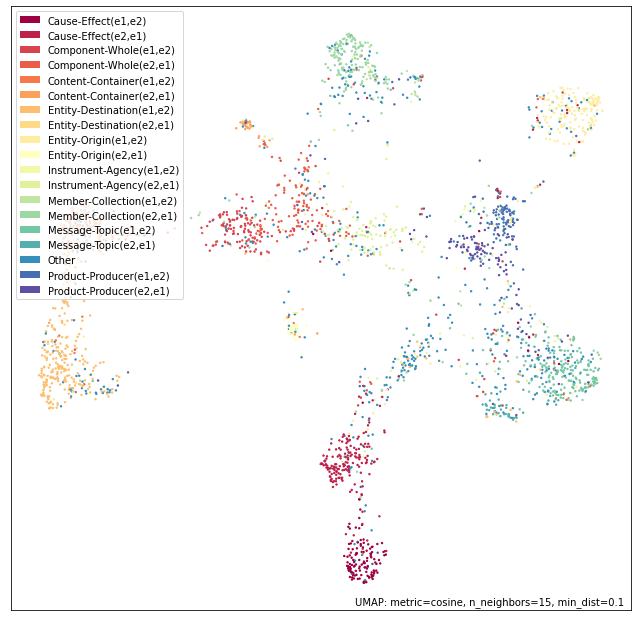

In [36]:
g = umap.plot.points(embedding3, labels=targets)